# Evaluating the Data

A complete set of data containing movie reviews with an expert classifying them as either `positive` or `negative` has been stored in a pickle file. The file also contains the classification results of the three libraries under examination, **TextBlob**, **Polyglot** and **Google NL**. The libraries produce results in the real number range of `[-1, 1]`. Since we wish to compare these to the test data, they have been converted to three classes.

The three classes  chosen are `positive`, `negative` and `neutral`. The reason for choosing `neutral` which doesn't exist in the test data is because all three libraries may classify text as not being objective, essentially containing no sentiment. The splitting of the data was done by classifying anything above `0` as `positive`, anything below `0` as `negative` and all entries equal to `0` as `neutral`. This is one assumption made for the evaluation of the libraries and we will follow up on later on.

We will begin by loading the pickle to a data frame.

In [1]:
import pandas as pd
pdata = pd.read_pickle('complete_data')
pdata[:10]

movie_id  movie_rating                                             review  \
0      9974             8  Sure this was a remake of a 70's film, but it ...   
1      9975            10  its not as good as the first movie,but its a g...   
2      9976             7  Sure, it was cheesy and nonsensical and at tim...   
3      9977             7  SPOILERS THROUGH: <br /><br />I really am in t...   
4      9978             8  I have to say, I loved Vanishing Point. I've s...   
5      9979             7  To start off with, since this movie is a remak...   
6       997             7  I have to agree with most of the other posts. ...   
7      9980             8  Any movie that shows federal PIGs (Persons In ...   
8      9981             7  In Canadian director Kari Skogland's film adap...   
9      9982             9  I saw this movie last night after waiting ages...   

      truth  textblob textblob_class  polyglot polyglot_class  google  \
0  positive  0.041598       positive  0.000000        neutral     0.1   
1  positive  0.527778       positive  0.800000       positive     0.8   
2  positive  0.202500       positive -0.230769       negative    -0.1   
3  positive  0.190819       positive  0.302326       positive     0.1   
4  positive  0.394231       positive  0.800000       positive     0.2   
5  positive  0.325926       positive  0.500000       positive     0.1   
6  positive  0.202895       positive  0.666667       positive     0.1   
7  positive  0.021338       positive -0.411765       negative    -0.3   
8  positive  0.049345       positive -0.121951       negative    -0.3   
9  positive  0.354663       positive  0.600000       positive     0.2   

  google_class  
0     positive  
1     positive  
2     negative  
3     positive  
4     positive  
5     positive  
6     positive  
7     negative  
8     negative  
9     positive

Briefly describing the data, we can see that the column `textblob` contains the real values for the library **TextBlob** and so on for `polyglot` and `google`. The columns containing the appended text `_class` after the library name contain the three classes `positive`, `negative` and `neutral`.

The `truth` column contains the test data.

# Examining the real data

Let's begin by visualizing the real data first and plotting it as a normal distribution.

In [2]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
fig_size = (10, 5)
def plot_normal_distribution(ax, class_name):
    sorted_data = sorted(pdata[class_name.lower()])
    fit = stats.norm.pdf(sorted_data,np.mean(sorted_data),np.std(sorted_data))
    ax.plot(sorted_data, fit)
    ax.hist(sorted_data, density=True)
    ax.set_title(class_name + ' Normal Distribution')

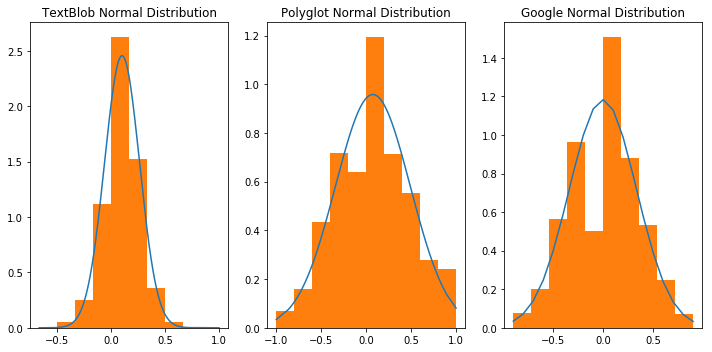

In [3]:
plt.close('all')
fig, axs = plt.subplots(1,3, figsize=fig_size)
plot_normal_distribution(axs[0], 'TextBlob')
plot_normal_distribution(axs[1], 'Polyglot')
plot_normal_distribution(axs[2], 'Google')
plt.tight_layout()

Simply by inspecting the shapes we can conclude that **TextBlob** has a much narrower distribution than **Polyglot** and **Google**. There are also some differences in the spread of the values with smaller peaks, again, for **Polyglot** and **Google**.

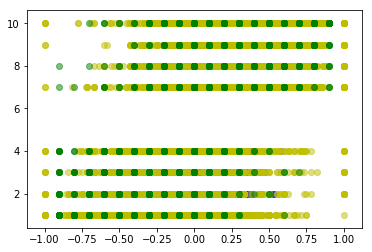

In [28]:
plt.scatter(x=pdata.textblob, y=pdata.movie_rating, alpha=0.5, color='b')
plt.scatter(x=pdata.polyglot, y=pdata.movie_rating,  alpha=0.5, color='y')
plt.scatter(x=pdata.google, y=pdata.movie_rating,  alpha=0.5, color='g')

From the scatter plot we can also see that there is a clear separation between positives and negatives in our training set. There are no movies with a rating in the proximity of `5`. The movie review are clearly `positive` or `negative` but all three libraries have scored some reviews at or around `0`.

In [4]:
print("TextBlob Description:\n{}\n{}".format(pdata.textblob.describe(), 
                                             '-'*80))
print("Polyglot Description:\n{}\n{}".format(pdata.polyglot.describe(), 
                                             '-'*80))
print("Google Description:\n{}\n{}".format(pdata.google.describe(), 
                                           '-'*80))

TextBlob Description:
count    6000.000000
mean        0.101323
std         0.162435
min        -0.666667
25%         0.005588
50%         0.105798
75%         0.200000
max         1.000000
Name: textblob, dtype: float64
--------------------------------------------------------------------------------
Polyglot Description:
count    6000.000000
mean        0.074652
std         0.416504
min        -1.000000
25%        -0.212121
50%         0.066667
75%         0.333333
max         1.000000
Name: polyglot, dtype: float64
--------------------------------------------------------------------------------
Google Description:
count    6000.000000
mean       -0.003050
std         0.337246
min        -0.900000
25%        -0.200000
50%         0.000000
75%         0.200000
max         0.900000
Name: google, dtype: float64
--------------------------------------------------------------------------------


In [5]:
Z2 = pdata.textblob.mean()+(pdata.textblob.std()*2)
print('"Usual" range for TextBlob is from {} to {}'.format((-1*round(Z2,4)), 
                                                           round(Z2,4)))
Z2 = pdata.polyglot.mean()+(pdata.polyglot.std()*2)
print('"Usual" range for Polyglot is from {} to {}'.format((-1*round(Z2,4)), 
                                                           round(Z2,4)))
Z2 = pdata.google.mean()+(pdata.google.std()*2)
print('"Usual" range for Google is from {} to {}'.format((-1*round(Z2,4)), 
                                                         round(Z2,4)))

"Usual" range for TextBlob is from -0.4262 to 0.4262
"Usual" range for Polyglot is from -0.9077 to 0.9077
"Usual" range for Google is from -0.6714 to 0.6714


From the descriptions we can see that the `mean` for **Google** is nearest to the center and the `median` is exactly `0`. The greatest standard deviation is for **Polyglot** with **Google** following and **TextBlob** having the smallest. Another interesting finding is that **TextBlob** does have a max of `1` but not a minimum of `-1` while **Polyglot** does. **Google** on the other hand never reaches these two limits. It only goes as low as `-0.9` and as high as `0.9`.

**TextBlob** appears to prefer labeling text closer to a neutral score, but at the same time avoiding it, tending toward positive with most of the concentration of the data around the center. Q3 falls within Z2 while Q1 is within Z1 and remains above `0`. It is clear from these numbers that **TextBlob** has a much higher chance of labeling something as positive than negative.

In the case of **Polyglot** we get a more diverse range of data with a greater distribution. The mean being near neutral at about `0.074` with Q1 and Q3 within Z2 almost equidistant. Contrary to the other two libraries we see that **Polyglot** chooses to label some reviews with `-1` and `1`, even though they are very unusual.

Looking at the statistics of **Google** we can see a perfectly balanced dataset. The median is at exactly `0` with Q1 and Q3 being precisely equidistant and within Z2. Even the minimum and mamixum values have the same distance from the median. **Google** is the library that comes closest to matching the actual data. 

# Examining the data split into Classes

## Using three Classes (Positive, Neutral, Negative)

In order to get a, more relevant, visual understanding of the results, we will plot the 3 class separated values as bar charts.

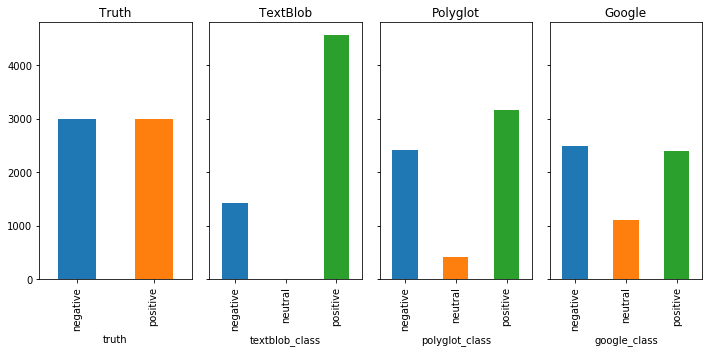

In [6]:
fig, axs = plt.subplots(1,4, sharey='all', figsize=fig_size)
pdata.groupby('truth')['movie_id'].nunique().plot.bar(ax=axs[0], 
                                                      title='Truth')
pdata.groupby('textblob_class')['movie_id'].nunique().plot.bar(ax=axs[1], 
                                                               title='TextBlob')
pdata.groupby('polyglot_class')['movie_id'].nunique().plot.bar(ax=axs[2], 
                                                               title='Polyglot')
pdata.groupby('google_class')['movie_id'].nunique().plot.bar(ax=axs[3], 
                                                             title='Google')
plt.tight_layout()
plt.show()

The first thing we notice here is that even though we began with a balanced dataset, as shown by the `Truth` graph, there is a clear skew with the rest.

In the case of **TextBlob**, there is a strong preference for `positive` with a complete absence of `neutral`. For **Polyglot** there is a greater number of `positive` labels but not as pronounced. Finaly for **Google** the reverse is true, containing slightly more `negative` labels than `positive` and with a great number of `neutral`.

Even though this is a good overview of the each library's performance, we need to dig a little deeper to see how accurate each one is and how they compare to each other.

We can begin by calculating the precision, recall and f-score of each one. In order to so, we will start with the confusion matrix for each.

Another way of visualizing the datapoint distribution of each library is by plotting the real values as a normal distribution.

### Confusion Matrices

We can get a better understanding of the accuracy of the models used in the libraries by calculating their respective confusion matrices and their derived values. We will compute the precision, recall and fscore for each library.

In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

First, let's calculate the confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
class_names = ['negative', 'neutral', 'positive']
cnf_matrix_textblob = confusion_matrix(pdata.truth, pdata.textblob_class)
cnf_matrix_polyglot = confusion_matrix(pdata.truth, pdata.polyglot_class)
cnf_matrix_google = confusion_matrix(pdata.truth, pdata.google_class)

We will now plot the matrices

Confusion matrix, without normalization
[[1269    1 1730]
 [   0    0    0]
 [ 158    0 2842]]


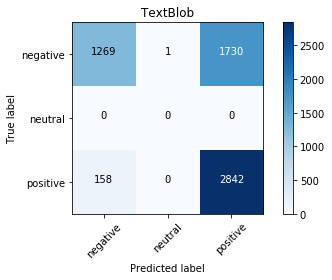

Confusion matrix, without normalization
[[1855  226  919]
 [   0    0    0]
 [ 568  195 2237]]


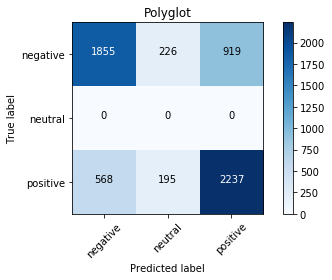

Confusion matrix, without normalization
[[2271  541  188]
 [   0    0    0]
 [ 227  562 2211]]


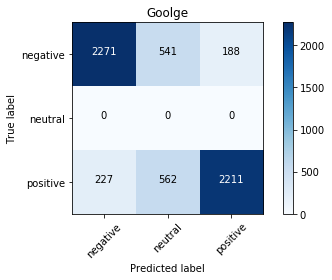

In [9]:
plot_confusion_matrix(cnf_matrix_textblob, 
                      classes=class_names, 
                      title='TextBlob')
plot_confusion_matrix(cnf_matrix_polyglot, 
                      classes=class_names, 
                      title='Polyglot')
plot_confusion_matrix(cnf_matrix_google, 
                      classes=class_names, 
                      title='Goolge')

### Prediction Performance Evaluation

In [10]:
from sklearn.metrics import precision_recall_fscore_support
(textblob_precision, 
 textblob_recall, 
 textblob_fbeta, 
 textblob_support) = precision_recall_fscore_support(
    pdata.truth, 
    pdata.textblob_class, 
    labels=['negative', 'neutral', 'positive'], 
    average='macro')
(polyglot_precision, 
 polyglot_recall, 
 polyglot_fbeta, 
 polyglot_support) = precision_recall_fscore_support(
    pdata.truth, 
    pdata.polyglot_class, 
    labels=['negative', 'neutral', 'positive'], 
    average='macro')
(google_precision, 
 google_recall, 
 google_fbeta, 
 google_support) = precision_recall_fscore_support(
    pdata.truth, 
    pdata.google_class, 
    labels=['negative', 'neutral', 'positive'], 
    average='macro')
print("TextBlob:\nPrecision: {} \tRecall: {} \tF-Score: {}".format(
    round(textblob_precision,3), 
    round(textblob_recall,3), 
    round(textblob_fbeta,3)
))
print("-"*80)
print("Polyglot:\nPrecision: {} \tRecall: {} \tF-Score: {}".format(
    round(polyglot_precision, 3), 
    round(polyglot_recall, 3), 
    round(polyglot_fbeta, 3)
))
print("-"*80)
print("Google:\nPrecision: {} \tRecall: {}\tF-Score: {}".format(
    round(google_precision, 3), 
    round(google_recall, 3), 
    round(google_fbeta, 3)
))

TextBlob:
Precision: 0.504 	Recall: 0.457 	F-Score: 0.441
--------------------------------------------------------------------------------
Polyglot:
Precision: 0.491 	Recall: 0.455 	F-Score: 0.47
--------------------------------------------------------------------------------
Google:
Precision: 0.61 	Recall: 0.498	F-Score: 0.548


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


From the **f-score** of all three libraries we see that **Google** has the best performance followed by **Polyglot** and last **TextBlob**.

## Using Two Classes (Positive, Negative) split at point 0

We could end the comparison here, given the results we have. But since we are essentially introducing an extra class to that contained in the test data in would be prudent to try and mitigate this factor. One approach to eliminating the `neutral` class is to convert the real data which is in the [-1, 1] range, into to 2 classes. All values above or equal to `0` will be labeled `positive` and all below `0`, `negative.

In [11]:
classify = lambda x: 'positive' if x >= 0 else 'negative'
vfunc = np.vectorize(classify)
pdata['textblob_binary'] = pd.Series(vfunc(pdata.textblob))
pdata['polyglot_binary'] = pd.Series(vfunc(pdata.polyglot))
pdata['google_binary'] = pd.Series(vfunc(pdata.google))
pdata[:3]

movie_id  movie_rating                                             review  \
0      9974             8  Sure this was a remake of a 70's film, but it ...   
1      9975            10  its not as good as the first movie,but its a g...   
2      9976             7  Sure, it was cheesy and nonsensical and at tim...   

      truth  textblob textblob_class  polyglot polyglot_class  google  \
0  positive  0.041598       positive  0.000000        neutral     0.1   
1  positive  0.527778       positive  0.800000       positive     0.8   
2  positive  0.202500       positive -0.230769       negative    -0.1   

  google_class textblob_binary polyglot_binary google_binary  
0     positive        positive        positive      positive  
1     positive        positive        positive      positive  
2     negative        positive        negative      negative

New let's plot the data as bar charts


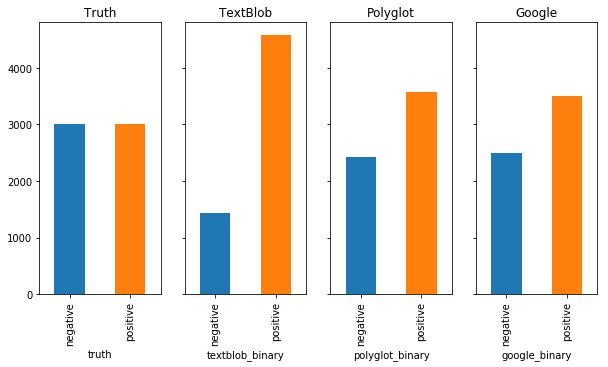

In [12]:
fig, axs = plt.subplots(1,4, sharey='all', figsize=fig_size)
pdata.groupby('truth')['movie_id'].nunique().plot.bar(ax=axs[0], 
                                                      title='Truth')
pdata.groupby('textblob_binary')['movie_id'].nunique().plot.bar(ax=axs[1], 
                                                                title='TextBlob')
pdata.groupby('polyglot_binary')['movie_id'].nunique().plot.bar(ax=axs[2], 
                                                                title='Polyglot')
pdata.groupby('google_binary')['movie_id'].nunique().plot.bar(ax=axs[3], 
                                                              title='Google')
plt.show()

The bar plots mirror the previous behavior of the libraries with **Google** now having more `positive` results than earlier. This is probably caused by the greater number of reviews it had classified as `neutral`.

### Confusion Matrices

Having created the new binary dataset we will recompute the confusion matrices and plot them

Confusion matrix, without normalization
[[1269 1731]
 [ 158 2842]]


Confusion matrix, without normalization
[[1855 1145]
 [ 568 2432]]


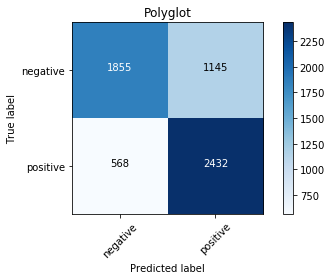

Confusion matrix, without normalization
[[2271  729]
 [ 227 2773]]


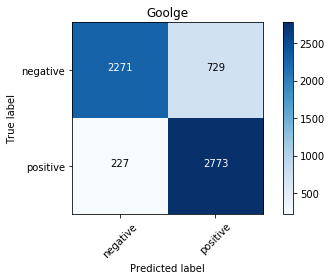

In [13]:
class_names = ['negative', 'positive']
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.textblob_binary) , 
                      classes=class_names, 
                      title='TextBlob')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.polyglot_binary), 
                      classes=class_names, 
                      title='Polyglot')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.google_binary), 
                      classes=class_names, 
                      title='Goolge')

A different pattern begins to emerge with the new dataset. We can see now that **TextBlob** and **Polyglot** have a relatively high number of false positives with **TextBlob** having slightly more. On the other hand they are reversed when it comes to false negatives. The numbers are much lower and this time **Polyglot** has more misses. **Google** continues to perform better than the rest with the lowest FPs and FNs. This behavior might be due to the arbitrary selection of the threshold between `positive` and `negative`. We can choose to calibrate it separately for each library and use the median to split the classes. This is not advisable though as it will eliminate each library's tendency for preferring one class over the other. Doing so splits the datasets evenly between two classes and will return an equal number of FPs and FNs.

### Prediction Performance Evaluation

In [15]:
from sklearn.metrics import classification_report
print(classification_report(pdata.truth, pdata.textblob_binary))
print(classification_report(pdata.truth, pdata.polyglot_binary))
print(classification_report(pdata.truth, pdata.google_binary))

             precision    recall  f1-score   support

   negative       0.89      0.42      0.57      3000
   positive       0.62      0.95      0.75      3000

avg / total       0.76      0.69      0.66      6000

             precision    recall  f1-score   support

   negative       0.77      0.62      0.68      3000
   positive       0.68      0.81      0.74      3000

avg / total       0.72      0.71      0.71      6000

             precision    recall  f1-score   support

   negative       0.91      0.76      0.83      3000
   positive       0.79      0.92      0.85      3000

avg / total       0.85      0.84      0.84      6000



As previously, **Google** has the best performance of the three followed by **Polyglot** and **TextBlob** last. The same trends appear here as well, with better scores for `negative` reviews than `positive`.

## Using Two Classes (Positive, Negative) split at the median

Intuitively, splitting the data in two using the median, is a not a good approach. We will test it though to see if we get significantly different results.

In [16]:
classify = lambda x: 'positive' if x >= pdata.textblob.median() else 'negative'
vfunc = np.vectorize(classify)
pdata['textblob_binary'] = pd.Series(vfunc(pdata.textblob))
classify = lambda x: 'positive' if x >= pdata.polyglot.median() else 'negative'
vfunc = np.vectorize(classify)
pdata['polyglot_binary'] = pd.Series(vfunc(pdata.polyglot))
classify = lambda x: 'positive' if x >= pdata.google.median() else 'negative'
vfunc = np.vectorize(classify)
pdata['google_binary'] = pd.Series(vfunc(pdata.google))

Let's plot the data as bar charts.

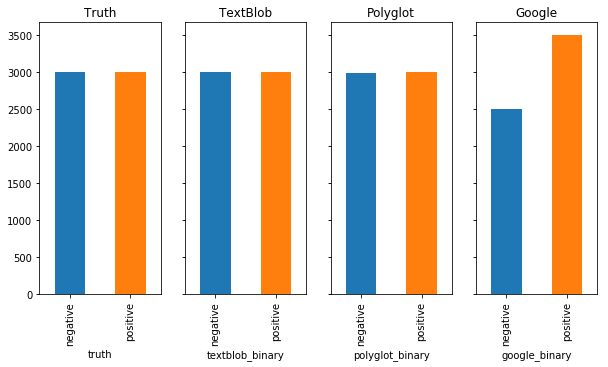

In [17]:
fig, axs = plt.subplots(1,4, sharey='all', figsize=fig_size)
pdata.groupby('truth')['movie_id'].nunique().plot.bar(ax=axs[0], 
                                                      title='Truth')
pdata.groupby('textblob_binary')['movie_id'].nunique().plot.bar(ax=axs[1], 
                                                                title='TextBlob')
pdata.groupby('polyglot_binary')['movie_id'].nunique().plot.bar(ax=axs[2], 
                                                                title='Polyglot')
pdata.groupby('google_binary')['movie_id'].nunique().plot.bar(ax=axs[3], 
                                                              title='Google')
plt.show()

It is starting to become clear that this approach creates artificially balanced datasets.

### Confusion Matrices

Confusion matrix, without normalization
[[2282  718]
 [ 718 2282]]


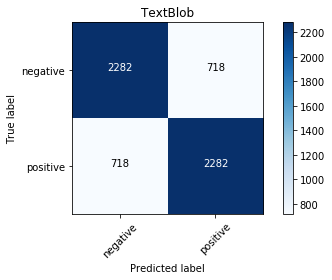

Confusion matrix, without normalization
[[2151  849]
 [ 839 2161]]


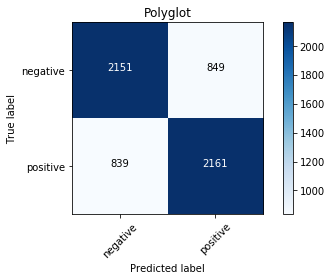

Confusion matrix, without normalization
[[2271  729]
 [ 227 2773]]


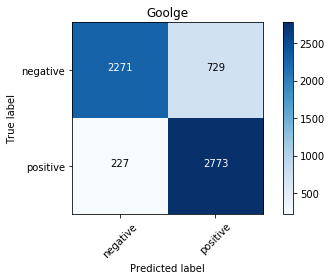

In [18]:
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.textblob_binary), 
                      classes=class_names, 
                      title='TextBlob')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.polyglot_binary), 
                      classes=class_names, 
                      title='Polyglot')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.google_binary), 
                      classes=class_names, 
                      title='Goolge')

From the matrices it is clear that the new datasets are biased and we have an absolute balance in FPs and FNs for **TextBlob** and **Polyglot**.

### Prediction Performance Evaluation

In [19]:
print(classification_report(pdata.truth, pdata.textblob_binary))
print(classification_report(pdata.truth, pdata.polyglot_binary))
print(classification_report(pdata.truth, pdata.google_binary))

             precision    recall  f1-score   support

   negative       0.76      0.76      0.76      3000
   positive       0.76      0.76      0.76      3000

avg / total       0.76      0.76      0.76      6000

             precision    recall  f1-score   support

   negative       0.72      0.72      0.72      3000
   positive       0.72      0.72      0.72      3000

avg / total       0.72      0.72      0.72      6000

             precision    recall  f1-score   support

   negative       0.91      0.76      0.83      3000
   positive       0.79      0.92      0.85      3000

avg / total       0.85      0.84      0.84      6000



This is the only case up to this point where the ranking differs. **Google** is still the best but now **TextBlob** comes in second and **Polyglot** third. The difference, though, here is smaller than before. We can also notice that the **f-measure** for both `positive` and `negative` is equal for **Polyglot** and **TextBlob**. It is expected sine FN and FP are equal for each of the two.

## Using Two Classes (Positive, Negative) split with 50% chance

Another, fairer approach is to keep the principal of splitting the datasets around the value of `0` but those that are at that point will be split between the two and not attributed to `positive`. Therefore the splitting will be `positive` for any value above, but not including `0`, `negative` for any value below zero and all values equal to `0` will be split to either `positive` or `negative` with a 50% change.

In [20]:
import random
classify = lambda x: 'positive' if x > 0.0 else ( 
    random.choice(['positive', 
                   'negative']
                 ) if x == 0.0 else 'negative' )
vfunc = np.vectorize(classify)
pdata['textblob_binary'] = pd.Series(vfunc(pdata.textblob))
pdata['polyglot_binary'] = pd.Series(vfunc(pdata.polyglot))
pdata['google_binary'] = pd.Series(vfunc(pdata.google))

Let's plot the new data as bar charts.

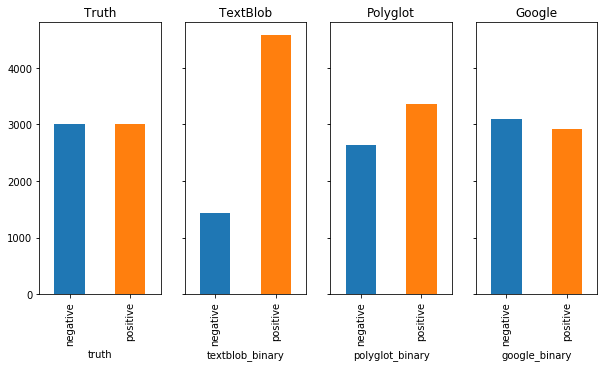

In [21]:
fig, axs = plt.subplots(1,4, sharey='all', figsize=fig_size)
pdata.groupby('truth')['movie_id'].nunique().plot.bar(ax=axs[0], 
                                                      title='Truth')
pdata.groupby('textblob_binary')['movie_id'].nunique().plot.bar(ax=axs[1], 
                                                                title='TextBlob')
pdata.groupby('polyglot_binary')['movie_id'].nunique().plot.bar(ax=axs[2], 
                                                                title='Polyglot')
pdata.groupby('google_binary')['movie_id'].nunique().plot.bar(ax=axs[3], 
                                                              title='Google')
plt.show()

### Confusion Matrices

We will once again plot the confusion matrices to evaluate the new data split.

Confusion matrix, without normalization
[[1269 1731]
 [ 158 2842]]


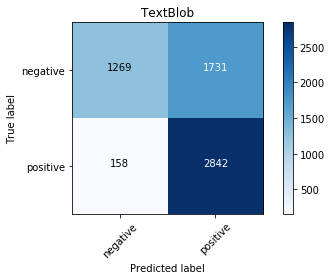

Confusion matrix, without normalization
[[1977 1023]
 [ 665 2335]]


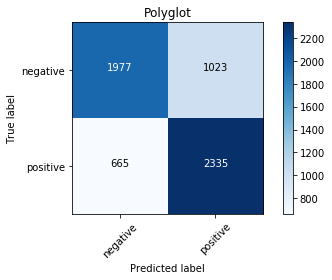

Confusion matrix, without normalization
[[2561  439]
 [ 529 2471]]


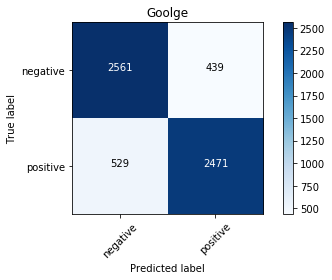

In [22]:
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.textblob_binary), 
                      classes=class_names, 
                      title='TextBlob')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.polyglot_binary), 
                      classes=class_names, 
                      title='Polyglot')
plot_confusion_matrix(confusion_matrix(pdata.truth, 
                                       pdata.google_binary), 
                      classes=class_names, 
                      title='Goolge')

Each library's data seems to now be split fairly into two classes. We can now more accurately compare the results of each library with the test data.

Having the new binary classification  we can compute the accuracy metrics for each case. We will calculate the **precision**, **recall** and **f-beta** for each.
We will calculate the with a β weight of 0.5, making it effectively an **f-measure**, since we don't have a preference over false positives or false negatives. We want to avoid both equally.

In [23]:
print(classification_report(pdata.truth, pdata.textblob_binary))
print(classification_report(pdata.truth, pdata.polyglot_binary))
print(classification_report(pdata.truth, pdata.google_binary))

             precision    recall  f1-score   support

   negative       0.89      0.42      0.57      3000
   positive       0.62      0.95      0.75      3000

avg / total       0.76      0.69      0.66      6000

             precision    recall  f1-score   support

   negative       0.75      0.66      0.70      3000
   positive       0.70      0.78      0.73      3000

avg / total       0.72      0.72      0.72      6000

             precision    recall  f1-score   support

   negative       0.83      0.85      0.84      3000
   positive       0.85      0.82      0.84      3000

avg / total       0.84      0.84      0.84      6000



If we isolate the **f-measure** we can see that **TextBlob** is better at predicting `negative` movie reviews than `positive` and with a greater difference that the rest. **Polyglot** is also better at predictin `negative` reviews but not much more than with `positive`. We can say it is fairer in predicting both classes compared to **TextBlob**. **Google** appears to be the best at classifying both `positive` and `negative` reviews but with a very slight preference for `positive`. The performance, though, of **Google** is much better than the other two libraries.

___
# Conclusion

After collecting all the computation performance metrics and the prediction performance we can draw some conclusion and decide on which library is optimal for our needs.


The clear winner among the three in correctly predicting the sentiment was **Google**. It performed significantly better than the other two libraries and delivered a more balanced result, not favoring `positive` or `negative` classifications. It does lag behind in time performance. Since the library is essentially a wrapper for Google's Natural Language API, all requests are sent to Google's servers for processing. Performance is therefore network dependent and has a very large hit due to the fact that each text blob is sent separately. In the case of this comparison that was each review, while in our desired use case scenario that would be for every tweet. If we were to process the text in bulk, in one request, the response time would be much smaller and we would also have the benefit of using only one request instead of the number of tweets we are analyzing.

A good runnerup is **Polyglot**. It performed marginally better than **TextBlob** but it delivered a more even result between the two classes. Performance wise it has a minimally longer computation time than **TextBlob**. The major advantage of **Polyglot** though is it's support for multiple language. It can automatically detect among 21 languages and perform the sentiment analysis using it's corresponding corpus. The language detection feature is also the cause for the extra computation time. **TextBlob** on the other hand only supports English.

Considering all of the above and taking into account the lowest possible cost for the best performance, I would suggest **Polyglot** for a live, always on system, that would monitor tweets in real time. If a bulk analysis is requests with the entire dataset available, **Google** is a much better option.